# Import Libraries

In [ ]:
import ast
from helpers.cards import find_cards
from collections import Counter
from itertools import combinations, islice
import pandas as pd
from matplotlib import pyplot as plt

# Load card information

In [3]:
card_info = find_cards()

# Load winner decks information from txt

In [4]:
winner_decks = []
with open("./data/winner_decks.txt", "r") as file:
    for line in file:
        deck = ast.literal_eval(line.strip())
        winner_decks.append(deck)

# Load winner cards information from txt

In [5]:
winner_cards = []
with open("./data/winner_cards.txt", "r") as file:
    for line in file:
        card = ast.literal_eval(line.strip())
        winner_cards.append(card)

# Load card information

In [6]:
card_info = find_cards()

# Load winner decks information from txt

In [7]:
winner_decks = []
with open("./data/winner_decks.txt", "r") as file:
    for line in file:
        deck = ast.literal_eval(line.strip())
        winner_decks.append(deck)

# Load winner cards information from txt

In [8]:
winner_cards = []
with open("./data/winner_cards.txt", "r") as file:
    for line in file:
        card = ast.literal_eval(line.strip())
        winner_cards.append(card)

# Create ID -> name dictionary

In [9]:
card_dict = {card['id']: card['name'] for card in card_info}

# Count the frequency of each card

In [10]:
card_counts = Counter(winner_cards)

# Top 10 Most Frequent Cards in Winning Decks

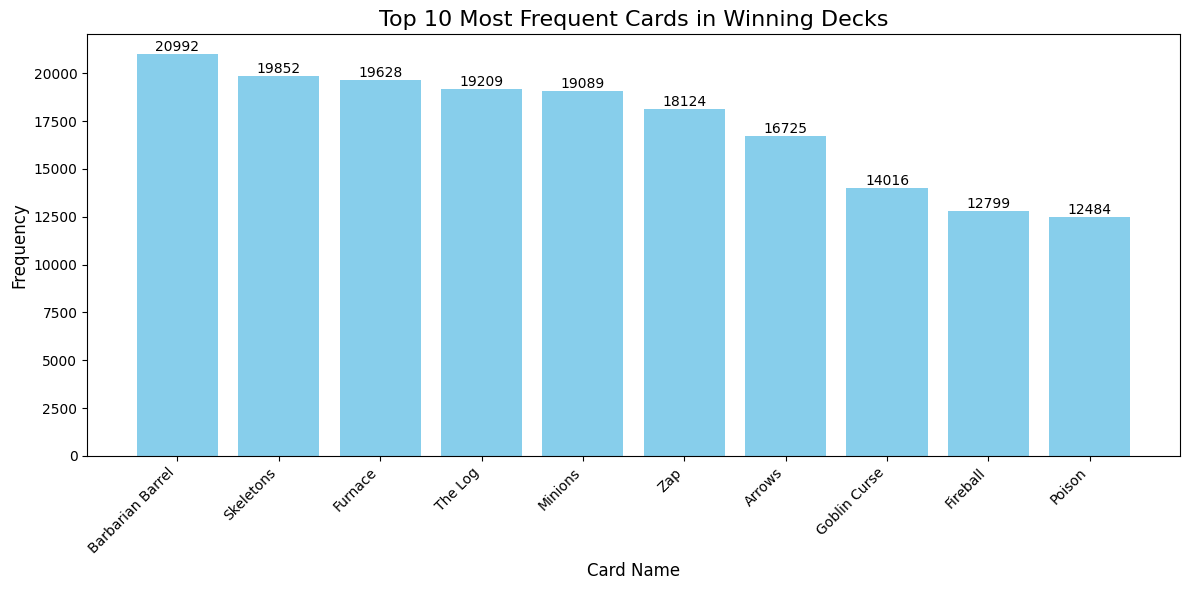

In [11]:
top_10 = card_counts.most_common(10)
names = [card_dict.get(card_id, "Unknown") for card_id, _ in top_10]
counts = [count for _, count in top_10]

plt.figure(figsize=(12,6))
bars = plt.bar(names, counts, color='skyblue')
plt.title("Top 10 Most Frequent Cards in Winning Decks", fontsize=16)
plt.xlabel("Card Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Top 10 Pairs


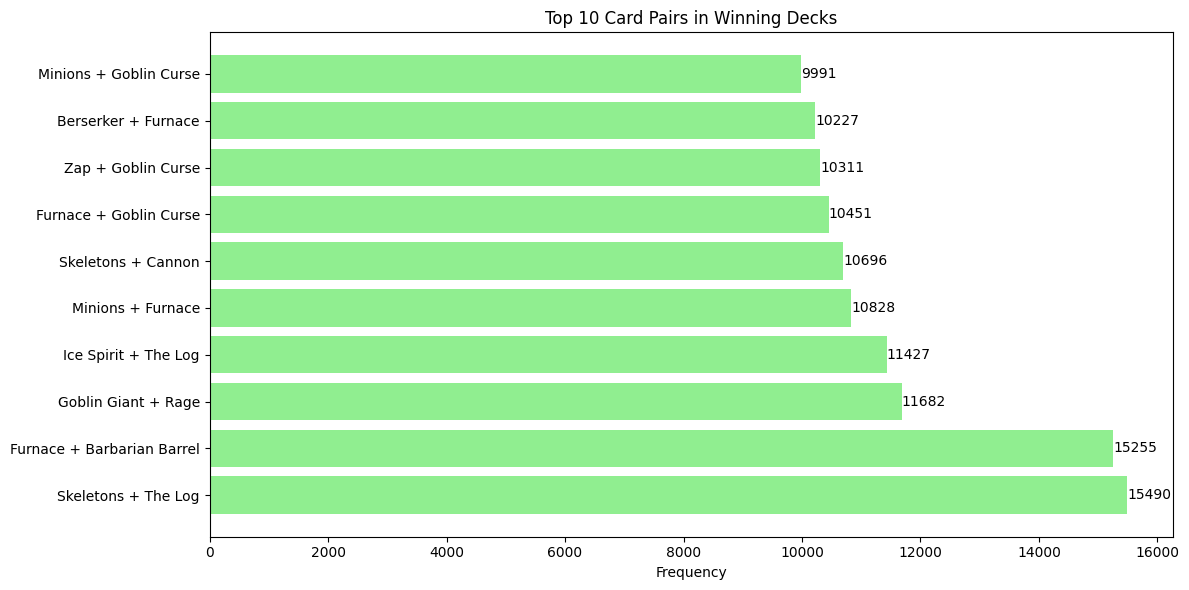

In [12]:
pair_counts = Counter()

for deck in winner_decks:
    for pair in combinations(deck, 2):
        pair_counts[tuple(sorted(pair))] += 1 

top_10_pairs = pair_counts.most_common(10)
top_10_pairs_named = [(card_dict.get(id1, "Unknown"), card_dict.get(id2, "Unknown"), count)
                      for (id1, id2), count in top_10_pairs]

pairs_names = [f"{n1} + {n2}" for n1, n2, _ in top_10_pairs_named]
pairs_counts = [count for _, _, count in top_10_pairs_named]

plt.figure(figsize=(12,6))
bars = plt.barh(pairs_names, pairs_counts, color='lightgreen')
plt.xlabel("Frequency")
plt.title("Top 10 Card Pairs in Winning Decks")

for bar, count in zip(bars, pairs_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.tight_layout()
plt.show()

# Average Elixir Cost Distribution of Winning Decks

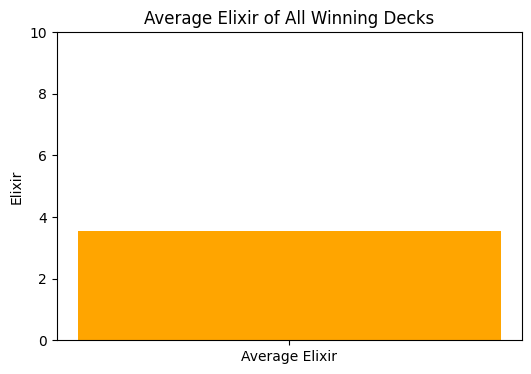

3.550878055989756


In [13]:
elixir_dict = {card['id']: card.get('elixirCost', 0) for card in card_info}

total_elixir = 0
total_cards = 0

for deck in winner_decks:
    for card_id in deck:
        if card_id in elixir_dict:
            total_elixir += elixir_dict[card_id]
            total_cards += 1

average_elixir = total_elixir / total_cards

plt.figure(figsize=(6,4))
plt.bar(["Average Elixir"], [average_elixir], color='orange')
plt.ylabel("Elixir")
plt.title("Average Elixir of All Winning Decks")
plt.ylim(0, max(average_elixir*1.5, 10))
plt.show()
print(average_elixir)


# Rarity Distribution of All Cards in Winning Decks

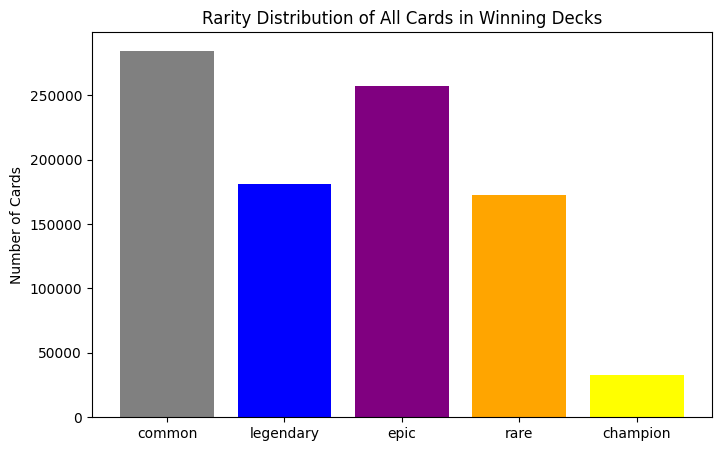

In [14]:
rarity_dict = {card['id']: card.get('rarity', 'Unknown') for card in card_info}

rarity_counter = Counter()

for deck in winner_decks:
    for card_id in deck:
        if card_id in rarity_dict:
            rarity_counter[rarity_dict[card_id]] += 1

# Grafik
plt.figure(figsize=(8,5))
plt.bar(rarity_counter.keys(), rarity_counter.values(), color=['gray', 'blue', 'purple', 'orange','yellow'])
plt.title("Rarity Distribution of All Cards in Winning Decks")
plt.ylabel("Number of Cards")
plt.show()

# 10 Least Common Cards in Winning Decks

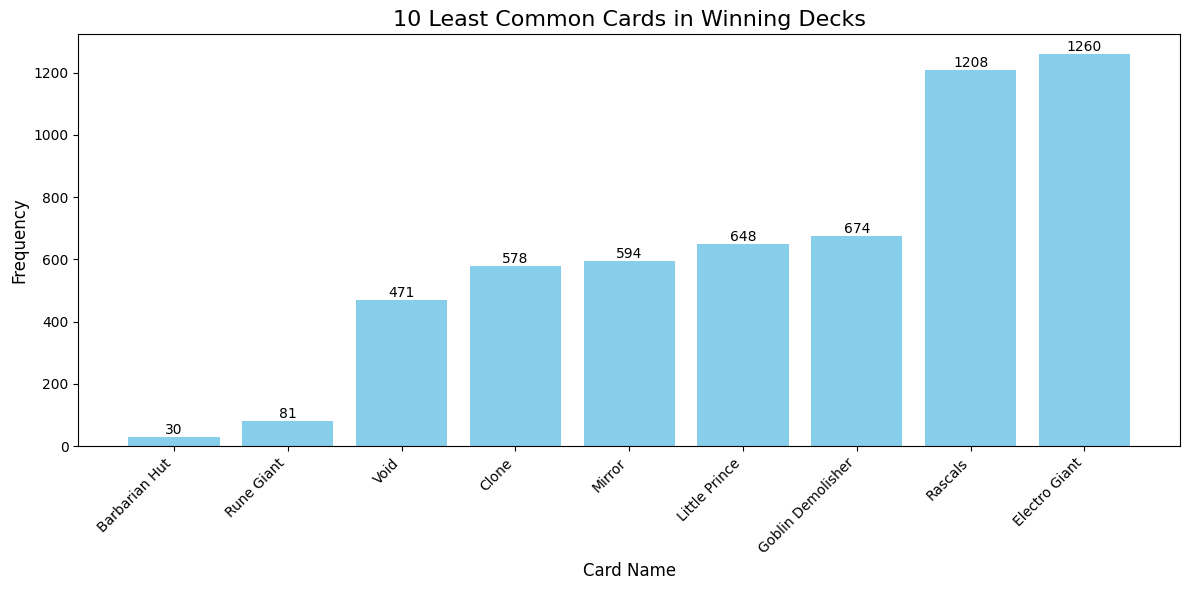

In [15]:
card_dict = {card['id']: card['name'] for card in card_info}

card_counts = Counter()
for deck in winner_decks:
    for card_id in deck:
        card_counts[card_id] += 1

bottom_10 = card_counts.most_common()[:-11:-1]  

bottom_10_filtered = [(card_id, count) for card_id, count in bottom_10 if card_id in card_dict]

names = [card_dict[card_id] for card_id, _ in bottom_10_filtered]
counts = [count for _, count in bottom_10_filtered]

plt.figure(figsize=(12,6))
bars = plt.bar(names, counts, color='skyblue')
plt.title("10 Least Common Cards in Winning Decks", fontsize=16)
plt.xlabel("Card Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Average Elixir Cost per Winning Deck

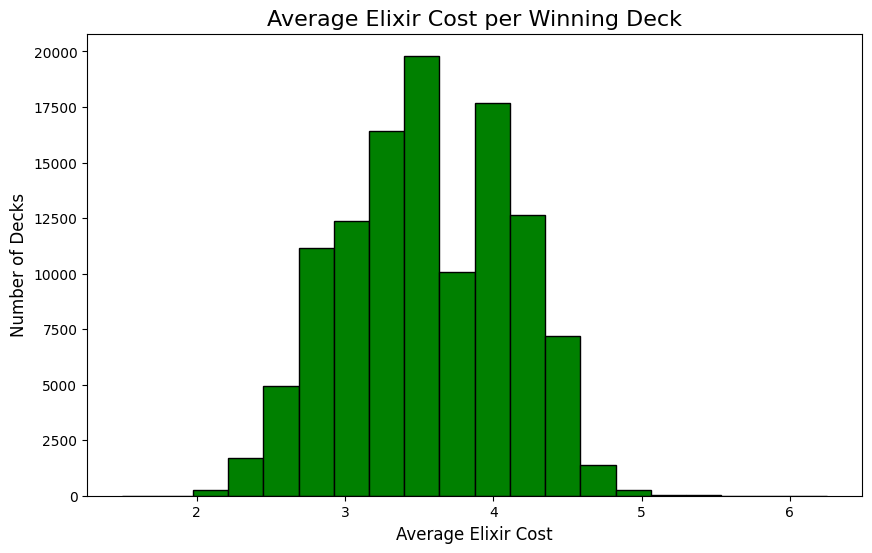

In [16]:
elixir_dict = {card['id']: card['elixirCost'] for card in card_info if 'elixirCost' in card}

avg_elixirs = []
for deck in winner_decks:
    elixirs = [elixir_dict.get(card_id, 0) for card_id in deck]  
    avg_elixirs.append(sum(elixirs)/len(elixirs))

# Histogram
plt.figure(figsize=(10,6))
plt.hist(avg_elixirs, bins=20, color='green', edgecolor='black')
plt.title("Average Elixir Cost per Winning Deck", fontsize=16)
plt.xlabel("Average Elixir Cost", fontsize=12)
plt.ylabel("Number of Decks", fontsize=12)
plt.show()

# Top 10 Winning Deck Archetype

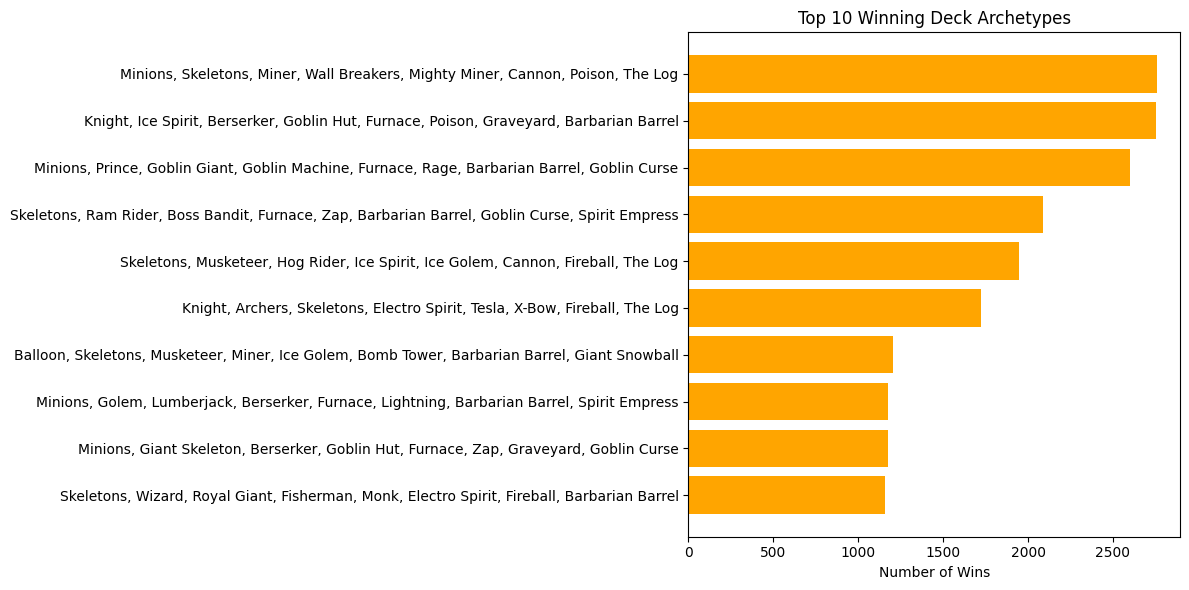

In [17]:
deck_tuples = [tuple(sorted(deck)) for deck in winner_decks]

archetype_counts = Counter(deck_tuples)

top_archetypes = archetype_counts.most_common(10)

id_to_name = {card['id']: card['name'] for card in card_info}

top_archetypes_names = [', '.join([id_to_name.get(card_id, f"Unknown({card_id})") for card_id in deck]) for deck, _ in top_archetypes]
counts = [count for _, count in top_archetypes]

# Bar chart
plt.figure(figsize=(12,6))
bars = plt.barh(top_archetypes_names, counts, color='orange')
plt.xlabel("Number of Wins")
plt.title("Top 10 Winning Deck Archetypes")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


# Elixir vs Rarity Heatmap of Winning Cards

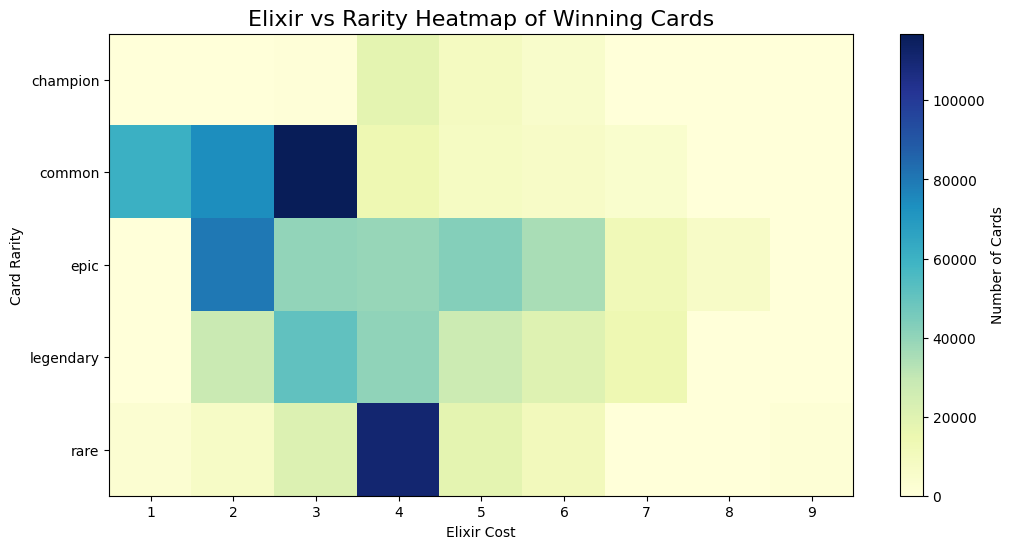

In [18]:
card_data = {card['id']: {'rarity': card['rarity'], 'elixir': card['elixirCost']} for card in card_info if 'rarity' in card and 'elixirCost' in card}

data_list = []
for deck in winner_decks:
    for card_id in deck:
        if card_id in card_data:
            data_list.append({
                'rarity': card_data[card_id]['rarity'],
                'elixir': card_data[card_id]['elixir']
            })

df = pd.DataFrame(data_list)

heatmap_data = df.pivot_table(index='rarity', columns='elixir', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Number of Cards')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.title("Elixir vs Rarity Heatmap of Winning Cards", fontsize=16)
plt.xlabel("Elixir Cost")
plt.ylabel("Card Rarity")
plt.show()
